In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from plot_utils import *
import numpy as np
import os
sns.set_theme(style="ticks", palette="muted")

In [8]:
# input_folder = "/home/tusco/videodct/PC-DARTS/saved_models/ucf101"
# # tags = ["train_acc", "valid_acc"]
# # y_labels = ["treinamento", "validação"]
# tags = ["train_loss", "valid_loss"]
# y_labels = ["treinamento", "teste"]

# txt_files = []
# for root, dirs, files in os.walk(input_folder):
#     for file in files:
#         if file.endswith(".txt"):
#              txt_files.append((os.path.join(root, file)))

# txt_files.sort()
# txt_files = [i for i in txt_files if "eval" in i][-6:]
# for file in txt_files:
#     ax = plt.axes()
#     ax.spines[['right', 'top']].set_visible(False)
#     for tag, label in zip(tags, y_labels):
#         values = extract_numbers(tag, file)
#         if len(values) == 0:
#             break
#         x_axis = [i+1 for i in range(len(values))]
#         if len(x_axis) == 1:
#             plt.plot(x_axis, values, "ro", label=label)
#             plt.annotate(f"{values[0]:.3f}", xy=(x_axis[0], values[0]))
#         else:
#             plt.plot(x_axis, values, label=label)
#             plt.annotate(f"{values[-1]:.3f}", xy=(x_axis[-1], values[-1]))
            
#             if tag == 'valid_acc':
#                 x_max = np.argmax(values)
#                 y_max = values[x_max]
#                 plt.vlines(x_max+1, ymax=y_max, ymin=0, linestyle=':', color='b')
#                 plt.plot(x_max+1, y_max, color=(1, 0, 1, 0.5), marker='x', label="maior validação")
#                 plt.annotate(f"{y_max:.2f}", (x_max+1, y_max), xytext=(x_max+1,y_max+1), color=(1, 0, 1, 1)) 
#     if len(values) > 0:       
#         plt.xlabel("Épocas")
#         plt.ylabel("Acurácia")
#         plt.title(os.path.basename(os.path.dirname(file)))
#         plt.legend()
#         plt.show()
#     else:
#         plt.clf()

    


/tmp/ipykernel_374/2801695582.py:77: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()
/tmp/ipykernel_374/2801695582.py:31: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, axs = plt.subplots(1, len(tags_all), sharex=True)


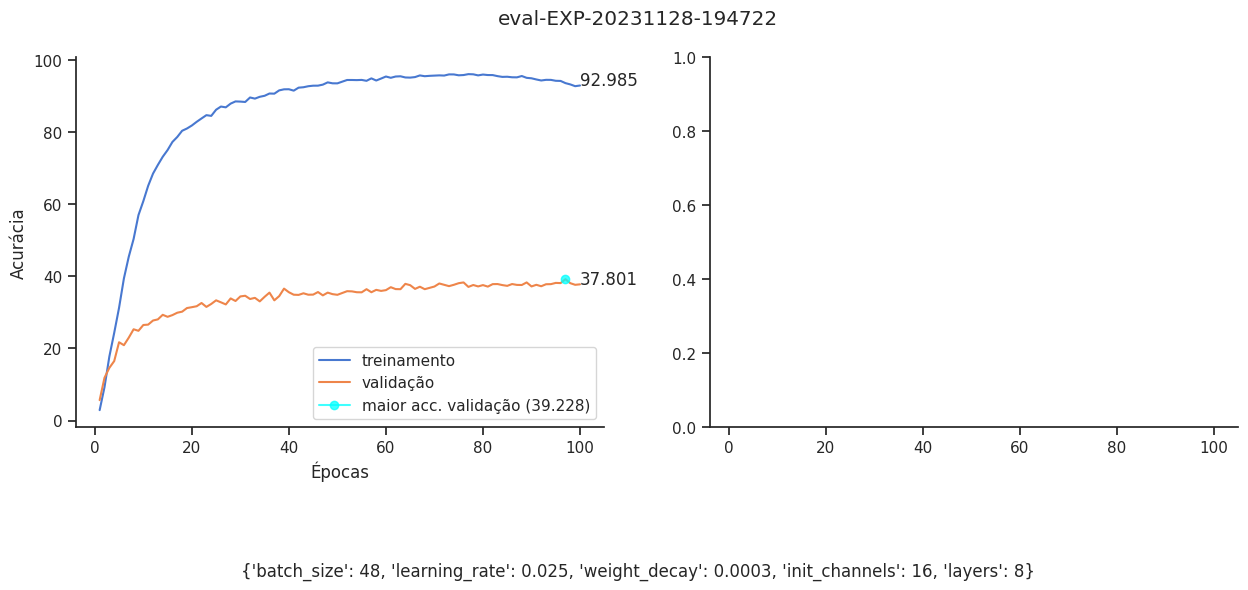

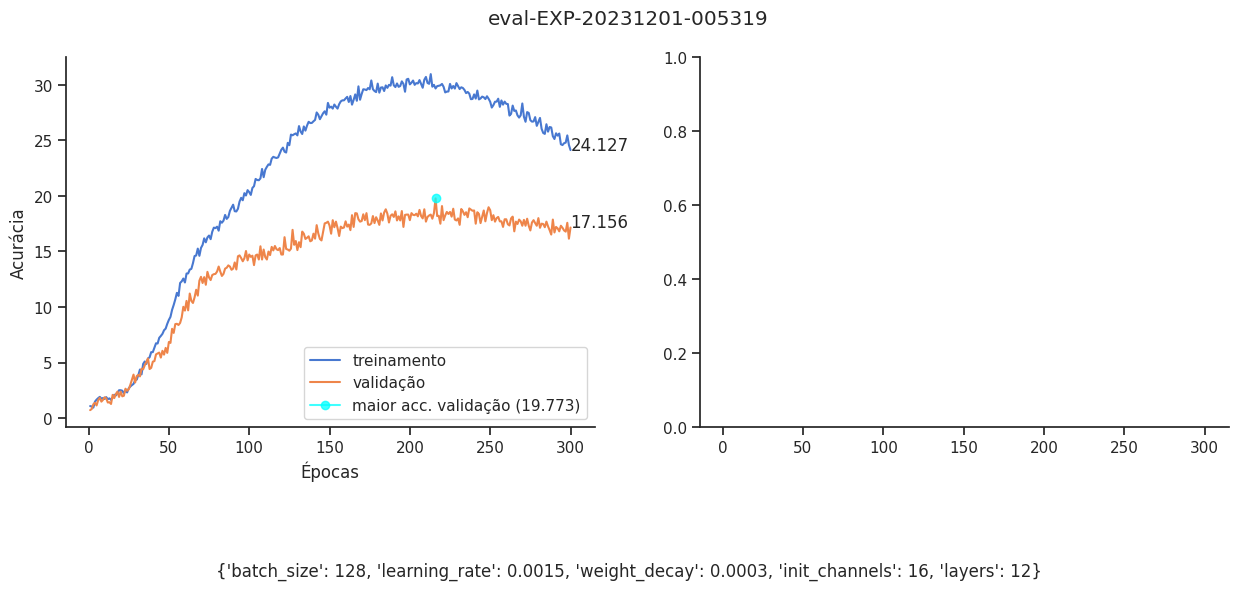

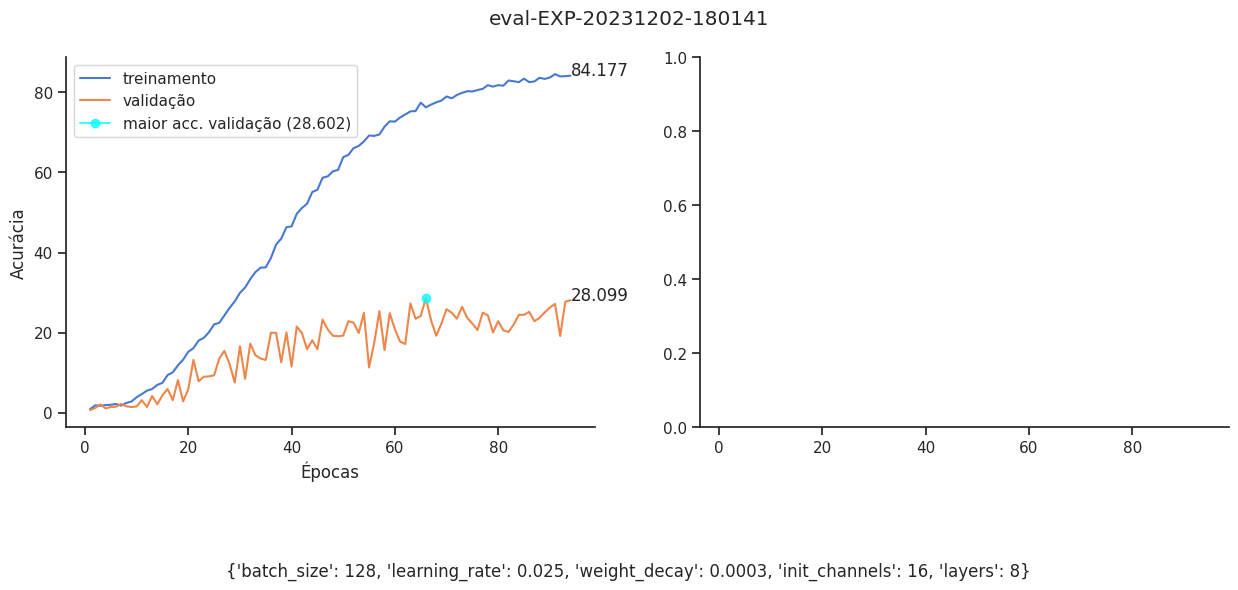

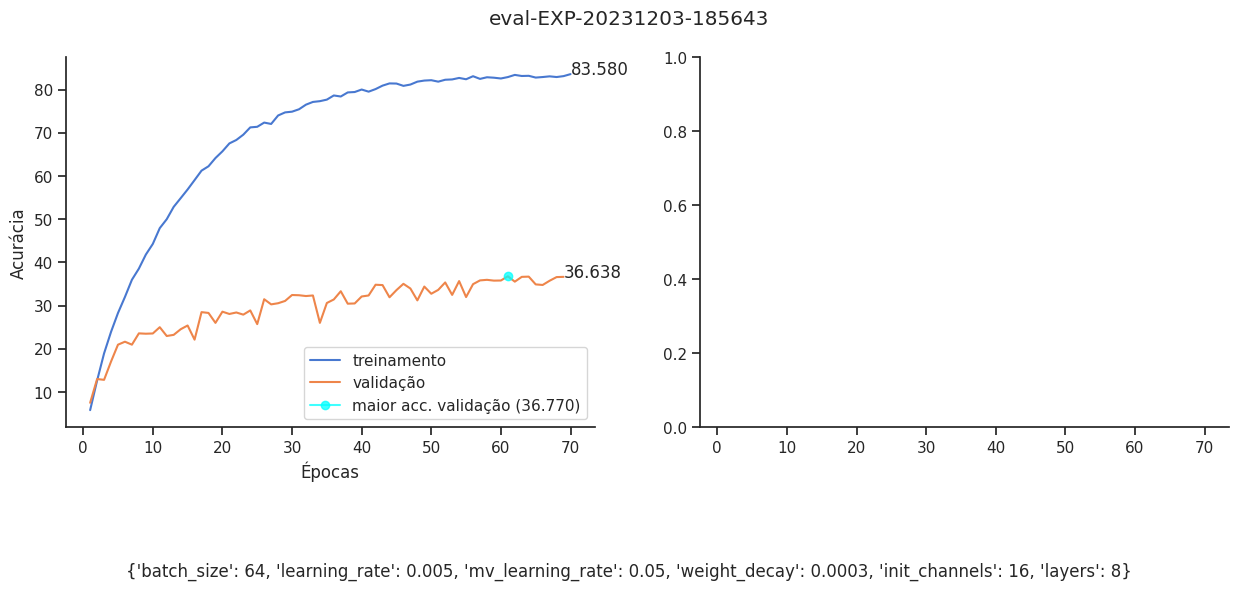

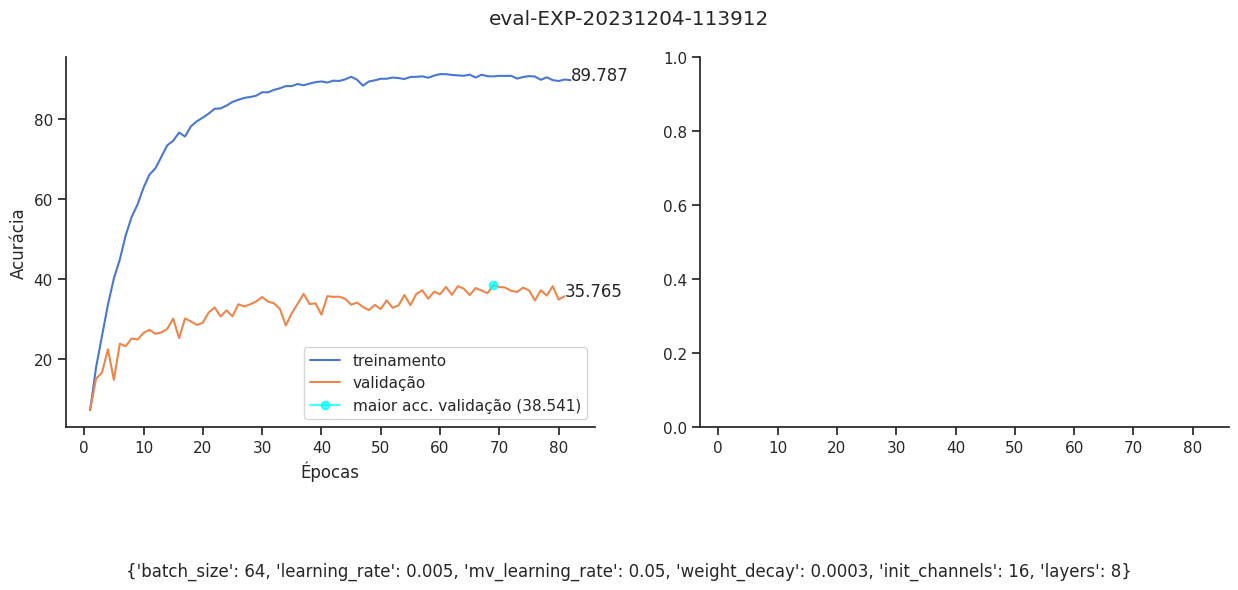

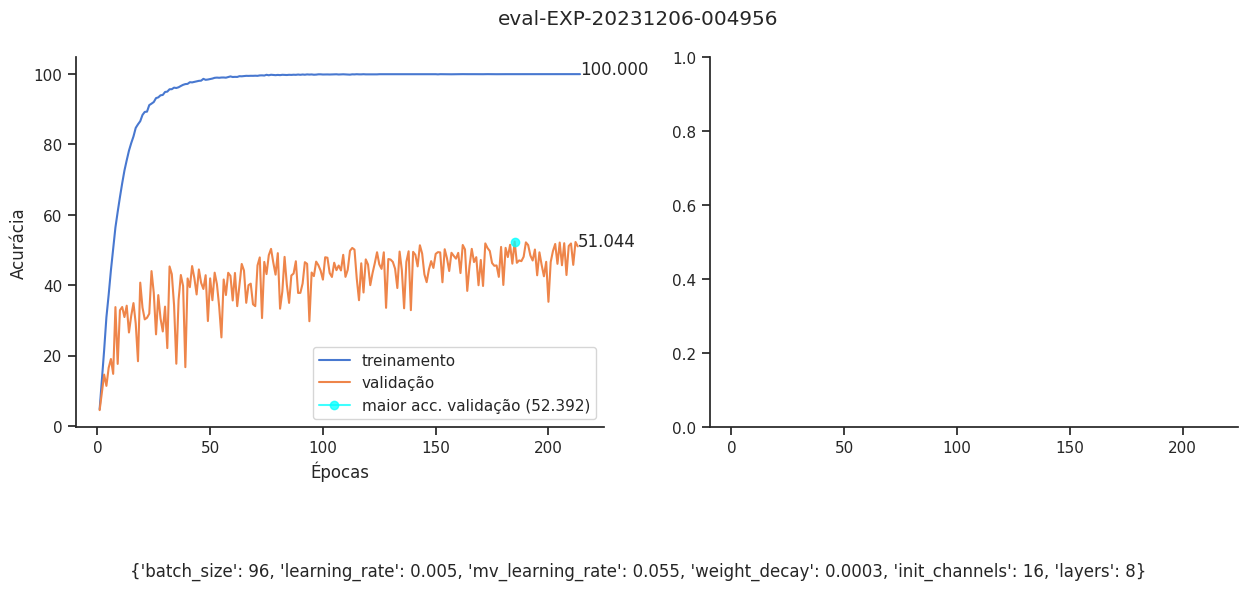

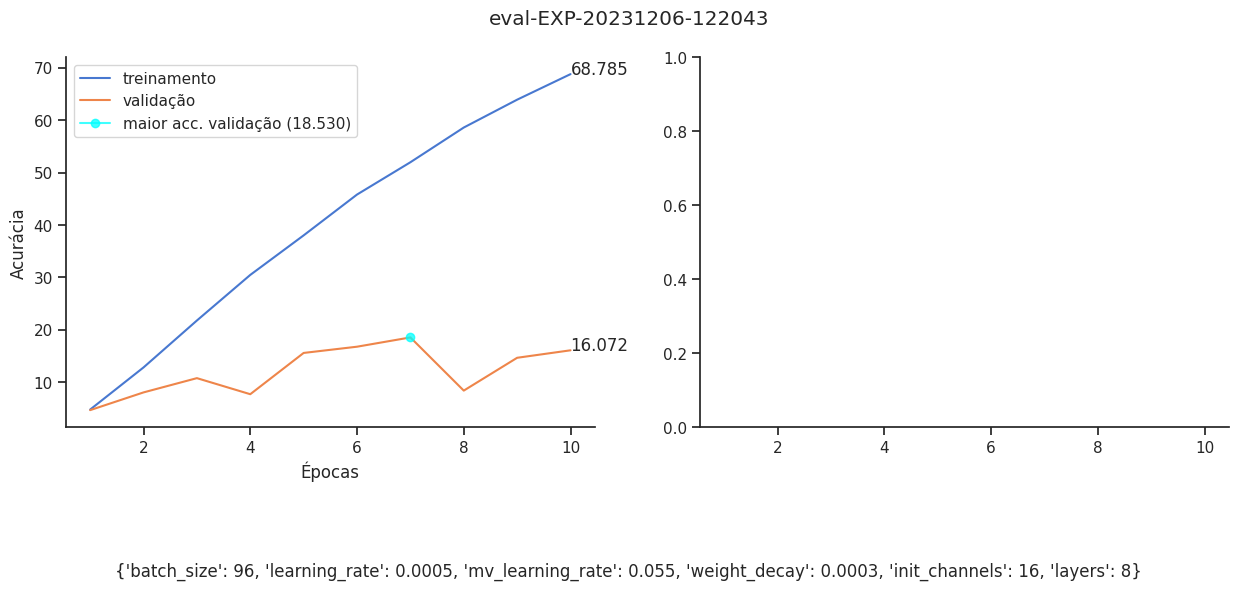

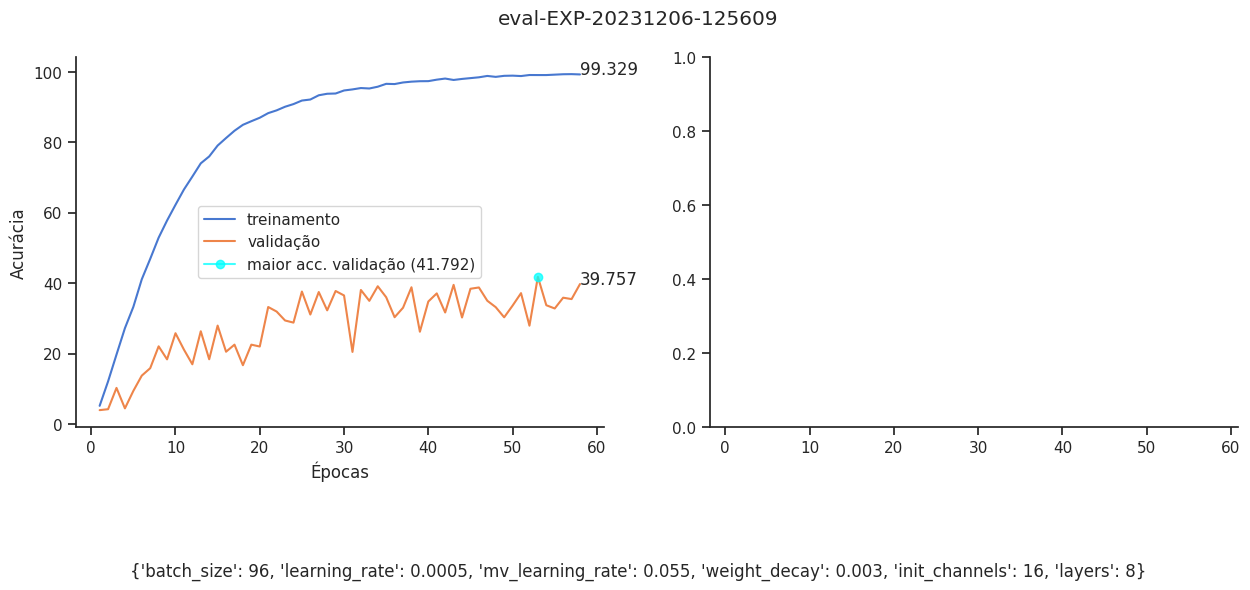

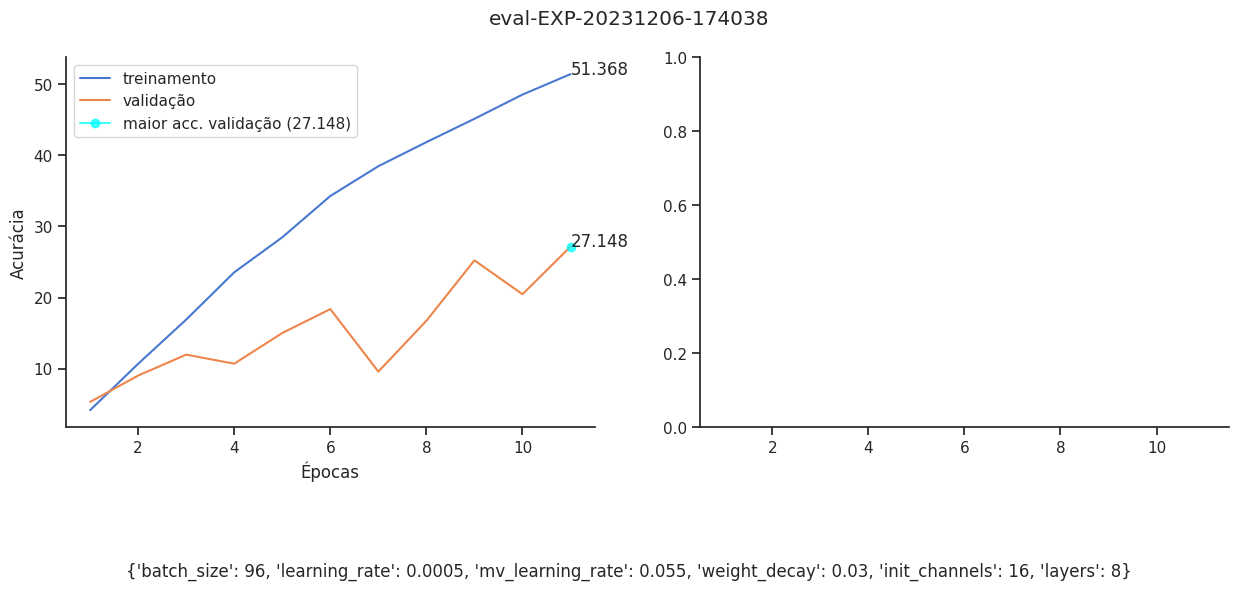

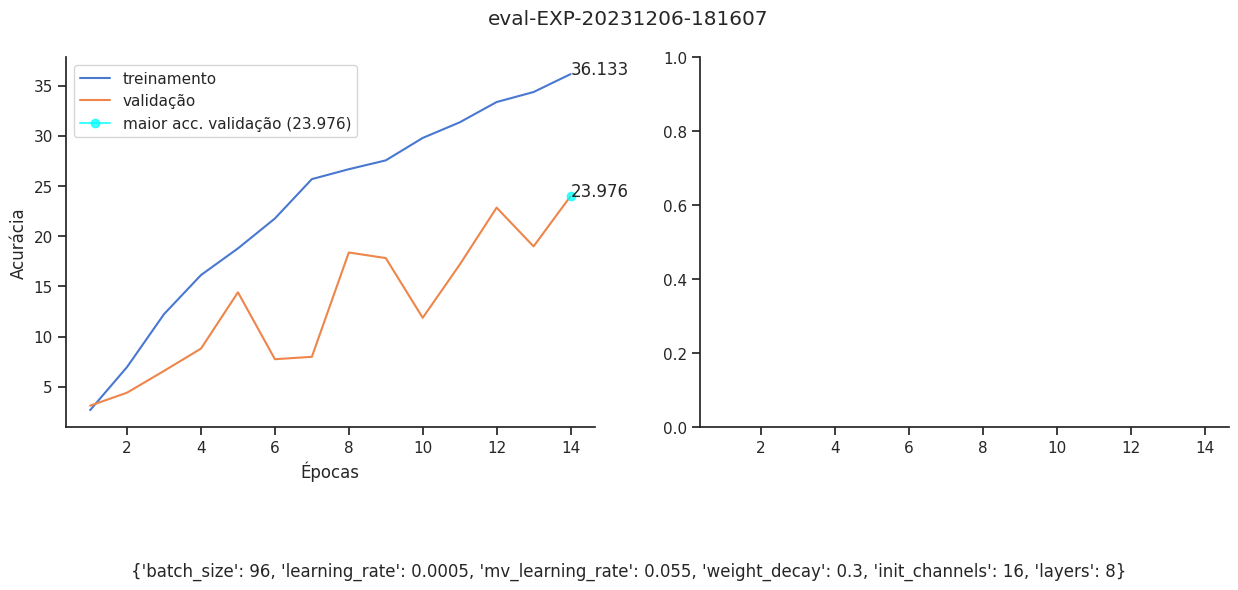

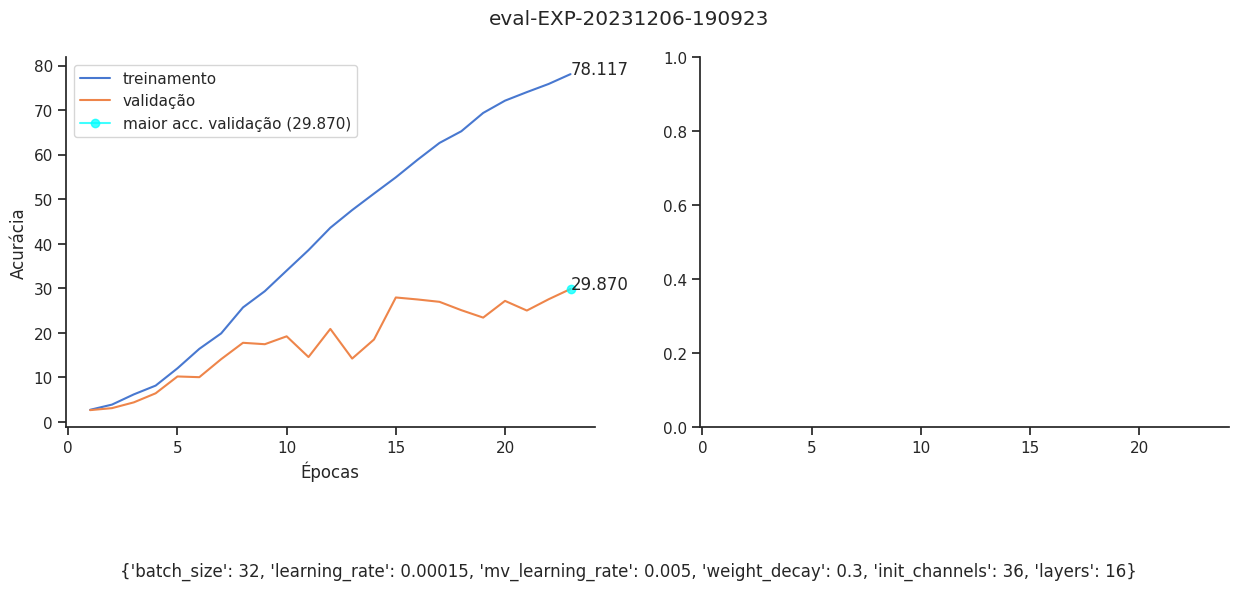

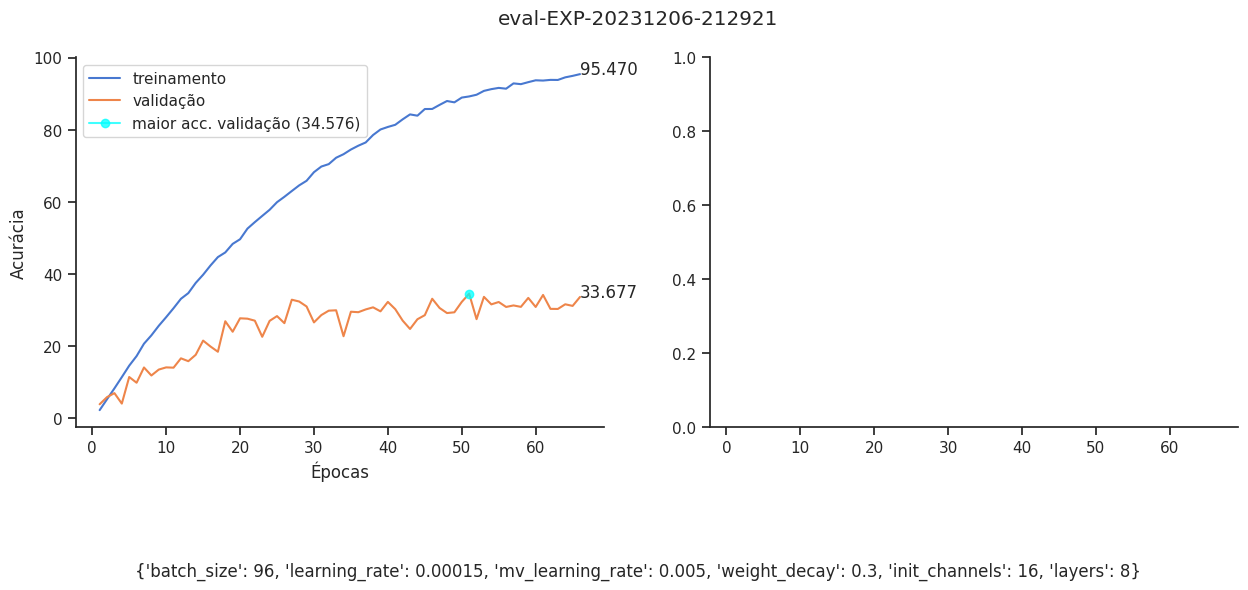

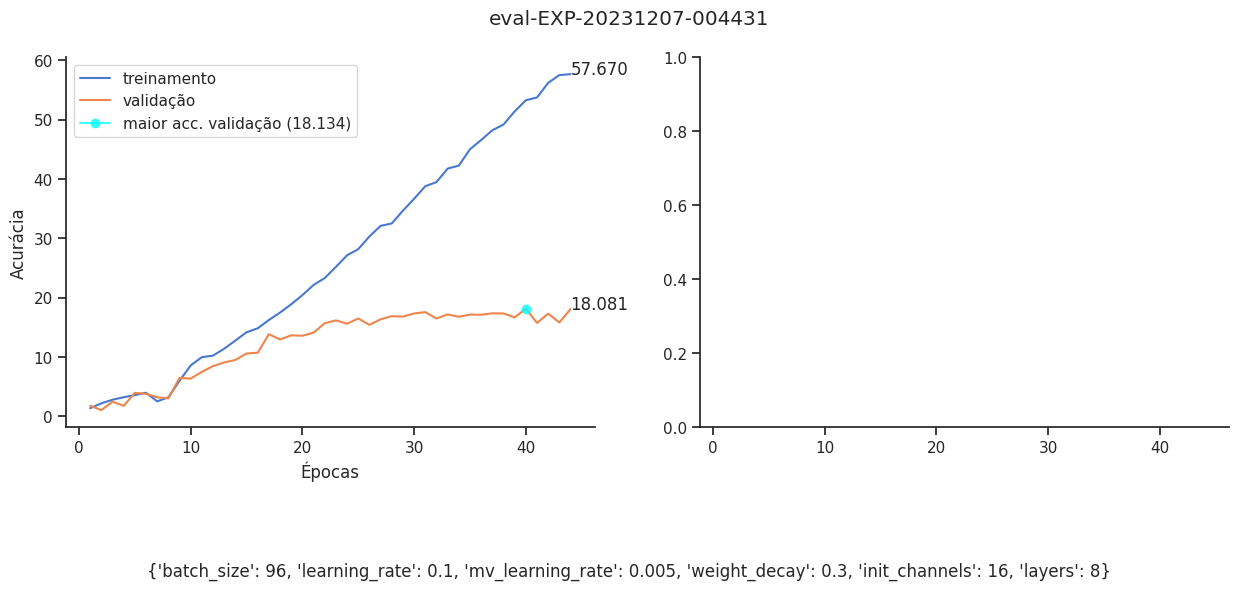

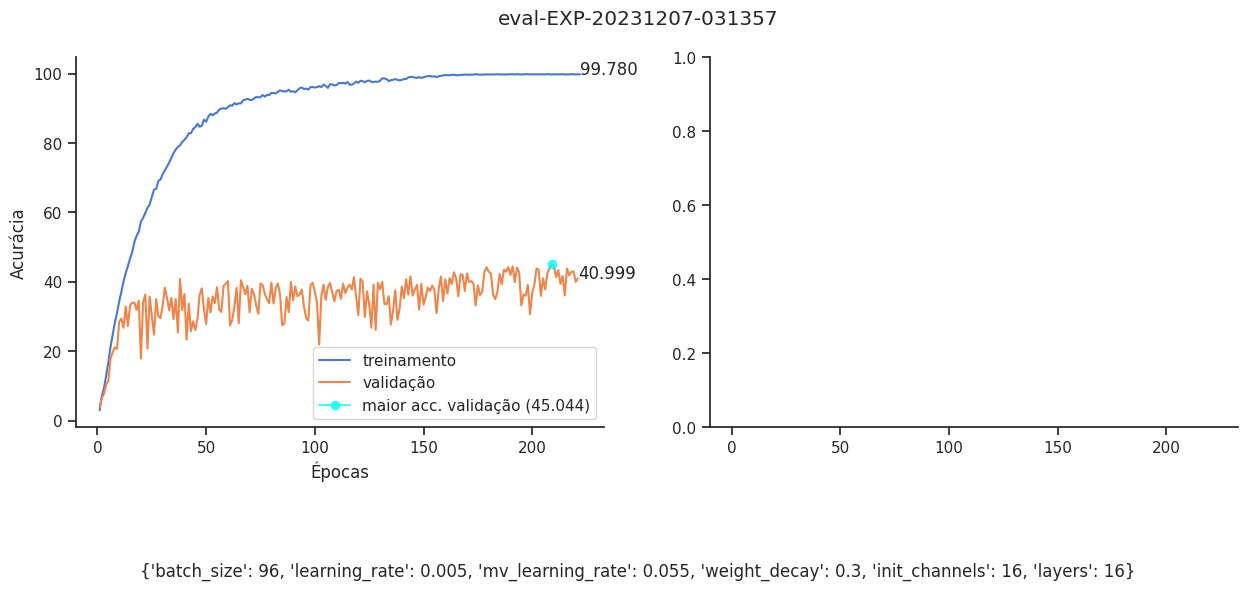

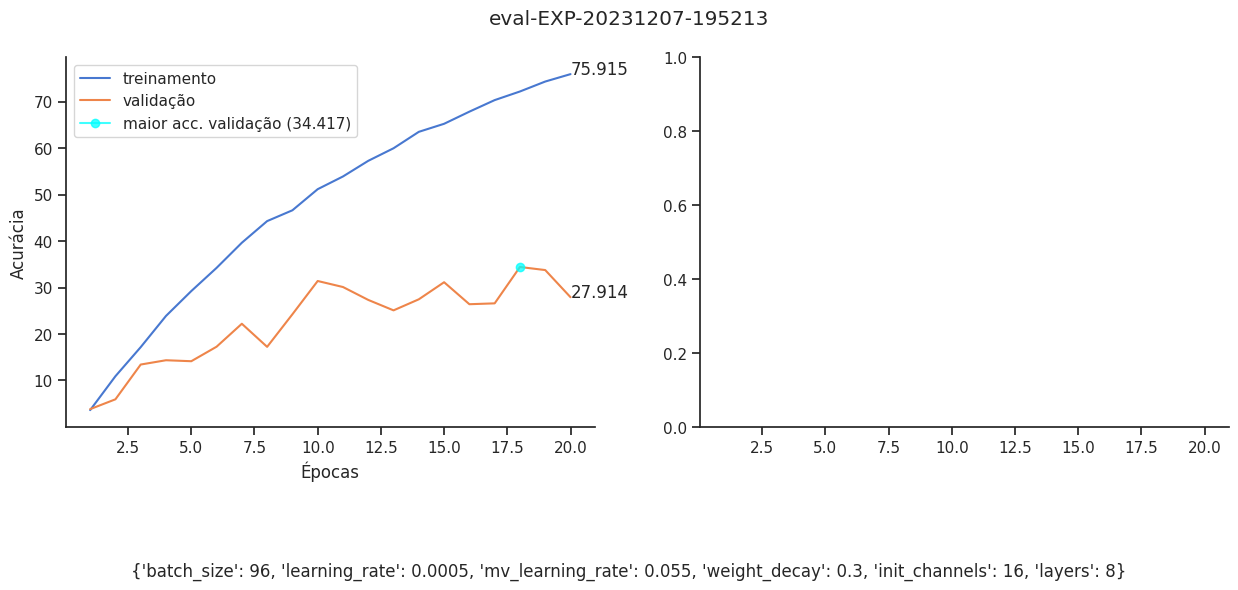

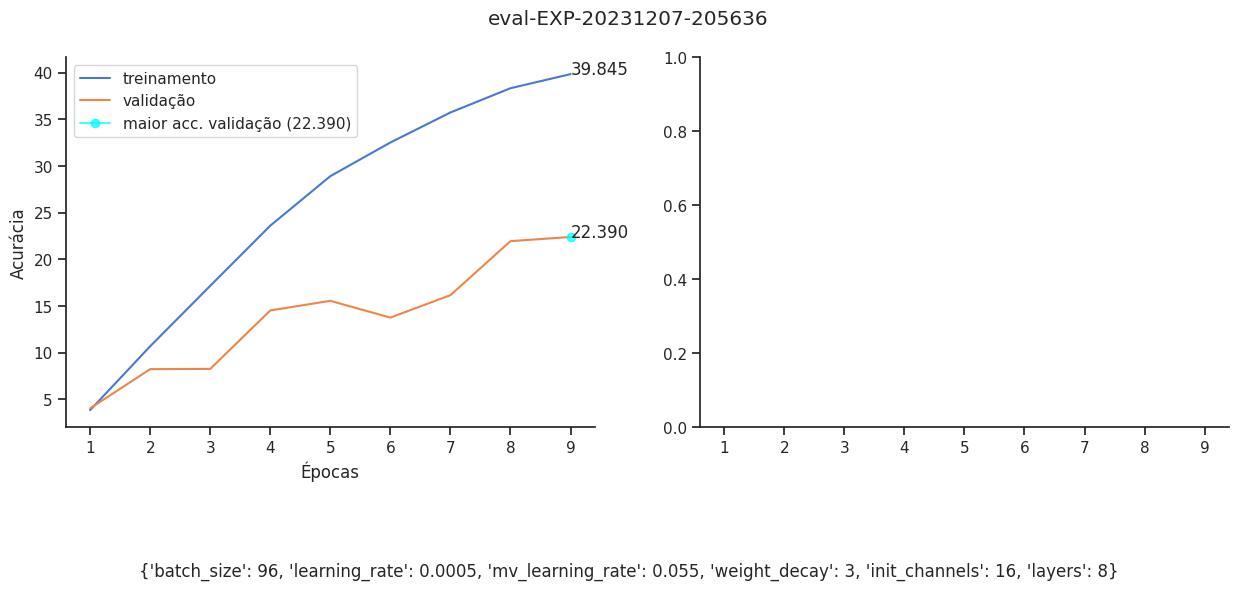

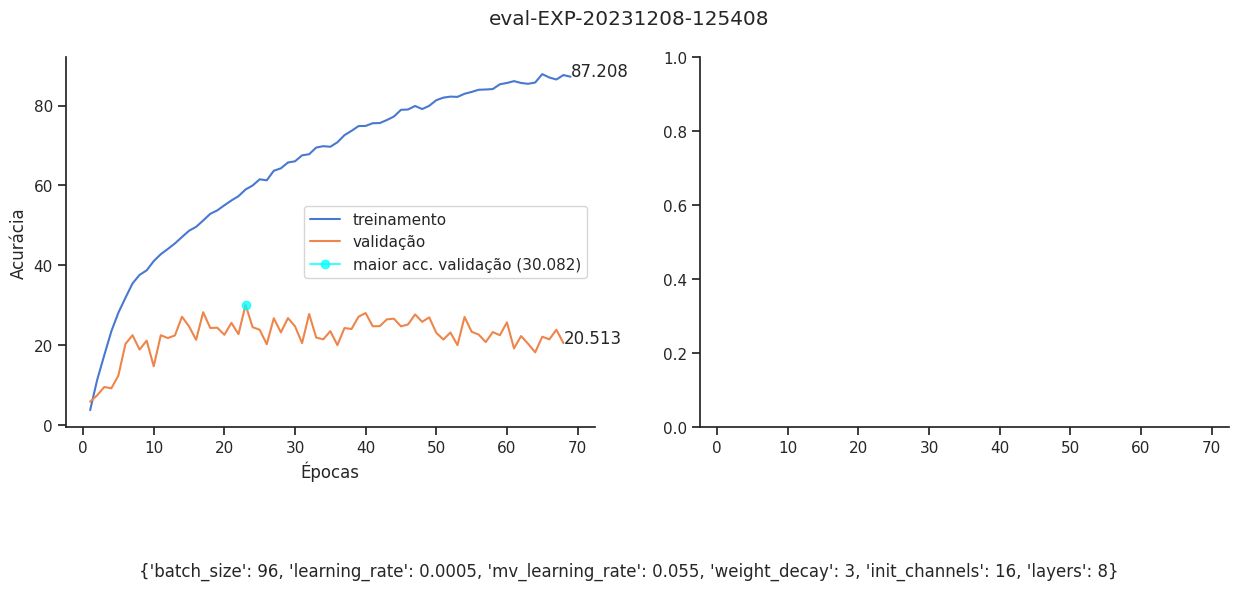

<Figure size 1500x480 with 0 Axes>

<Figure size 1500x480 with 0 Axes>

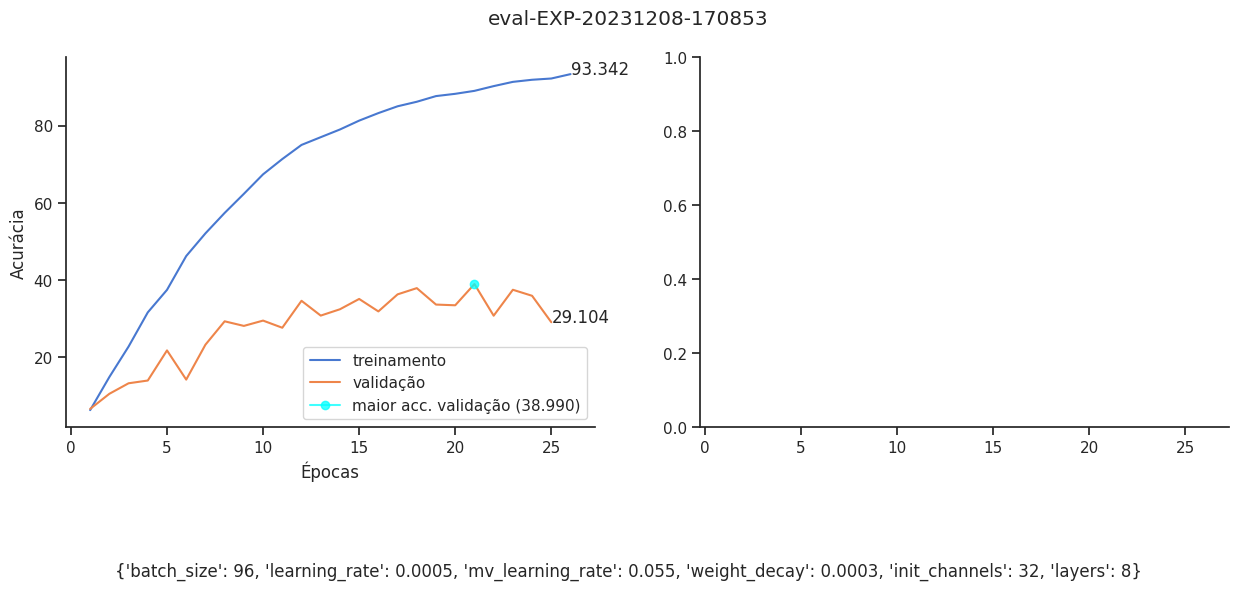

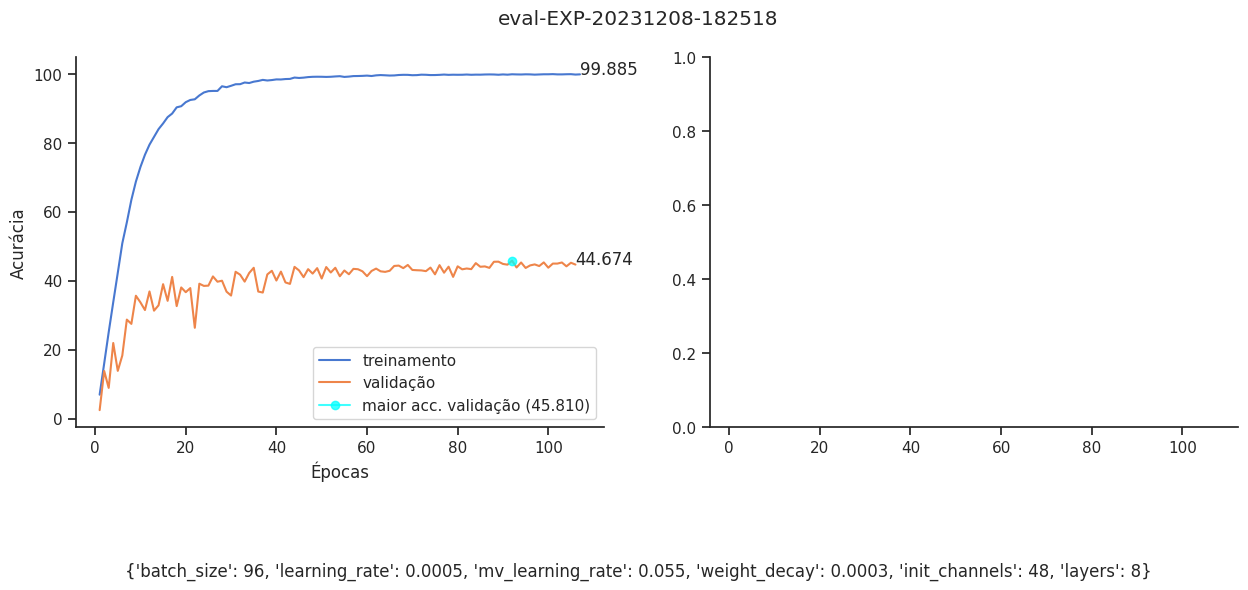

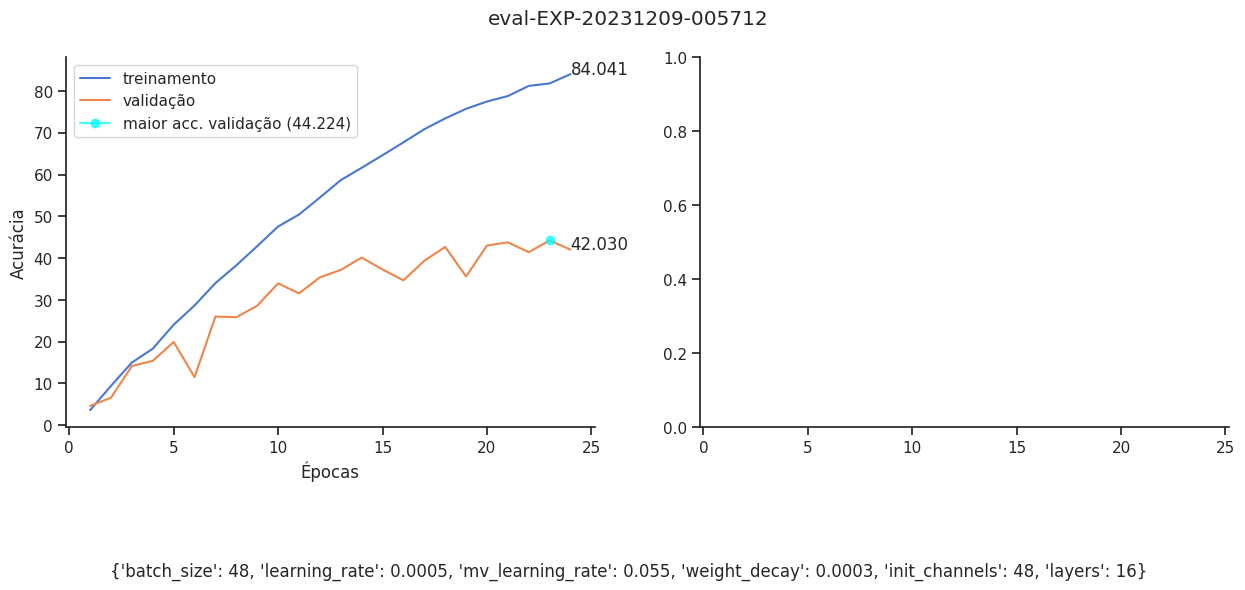

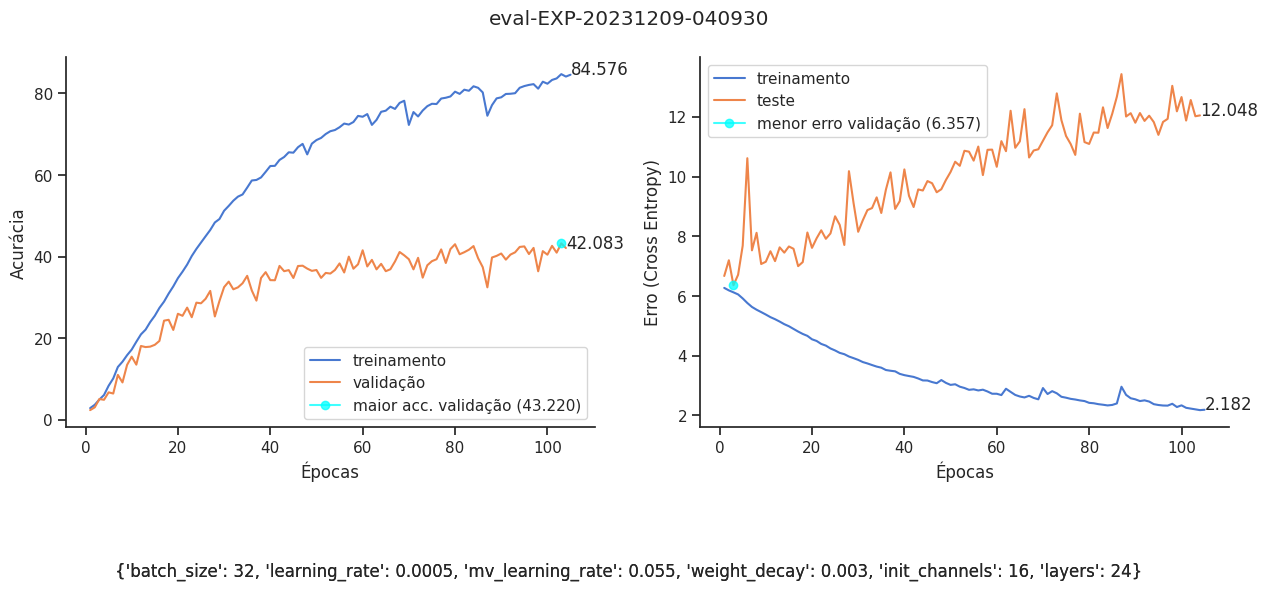

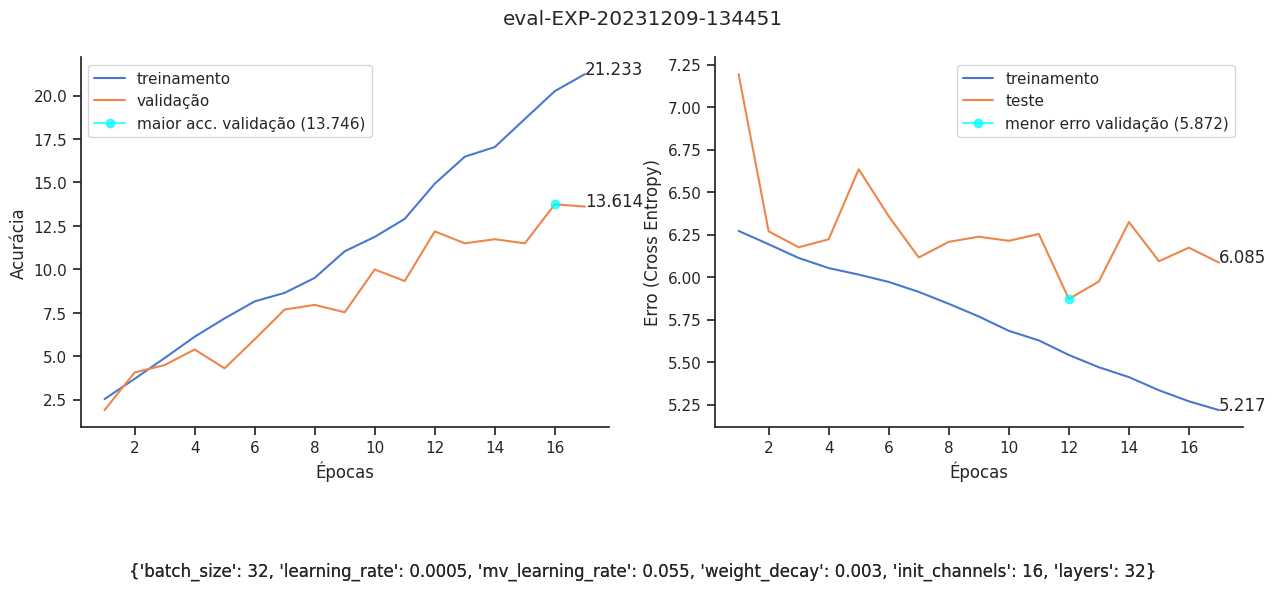

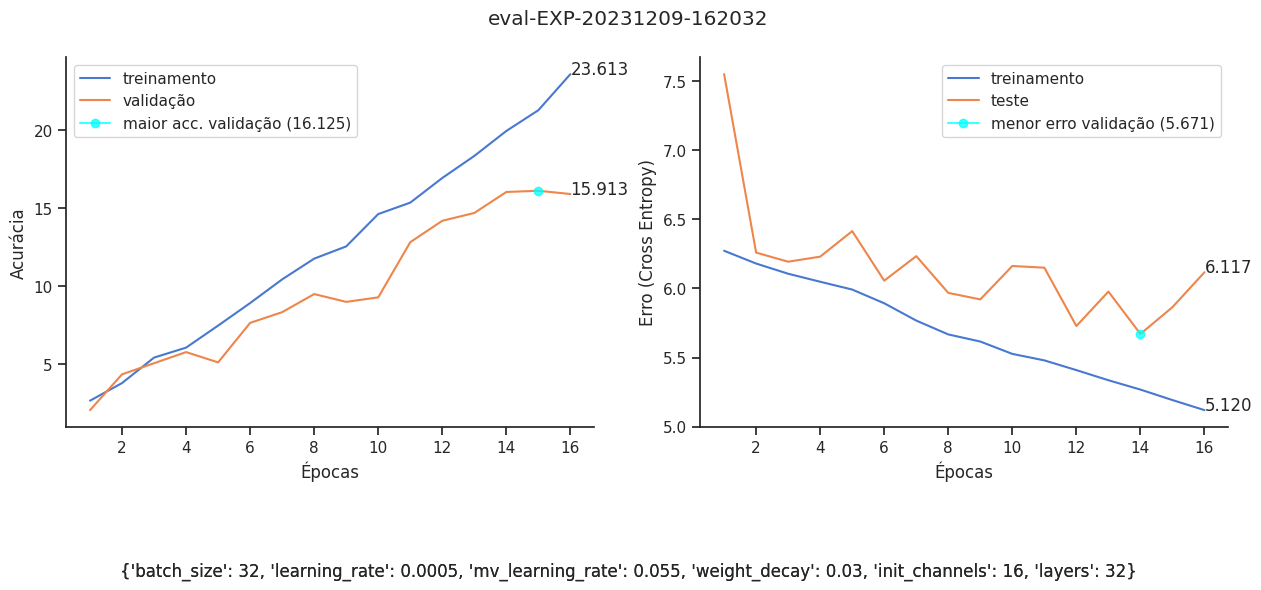

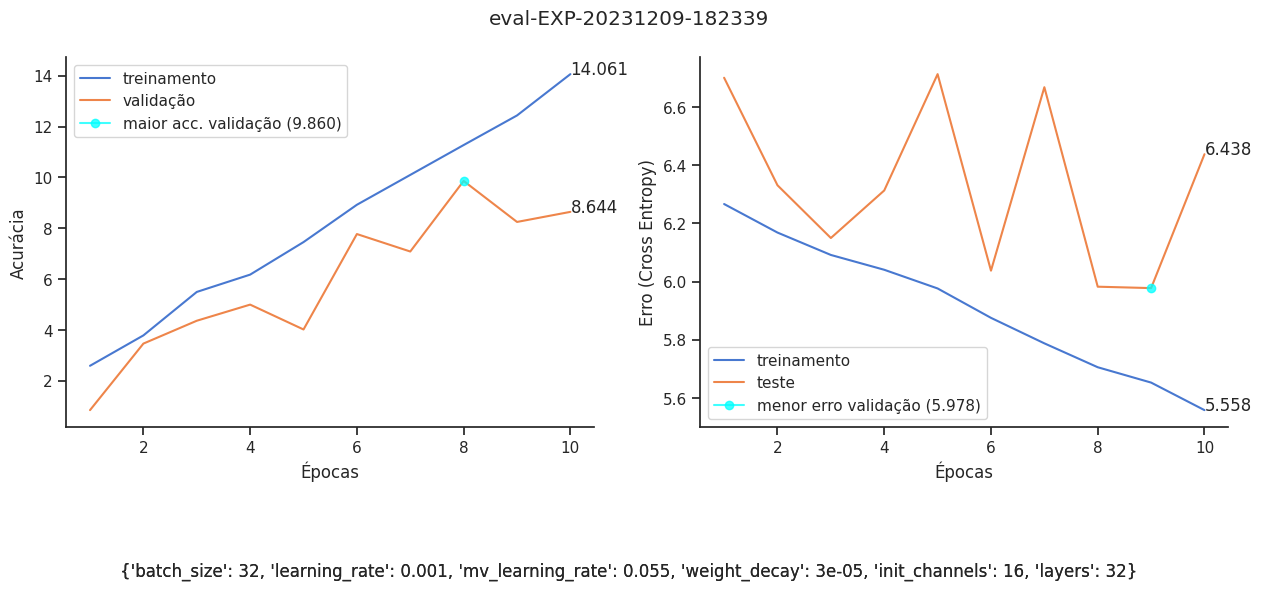

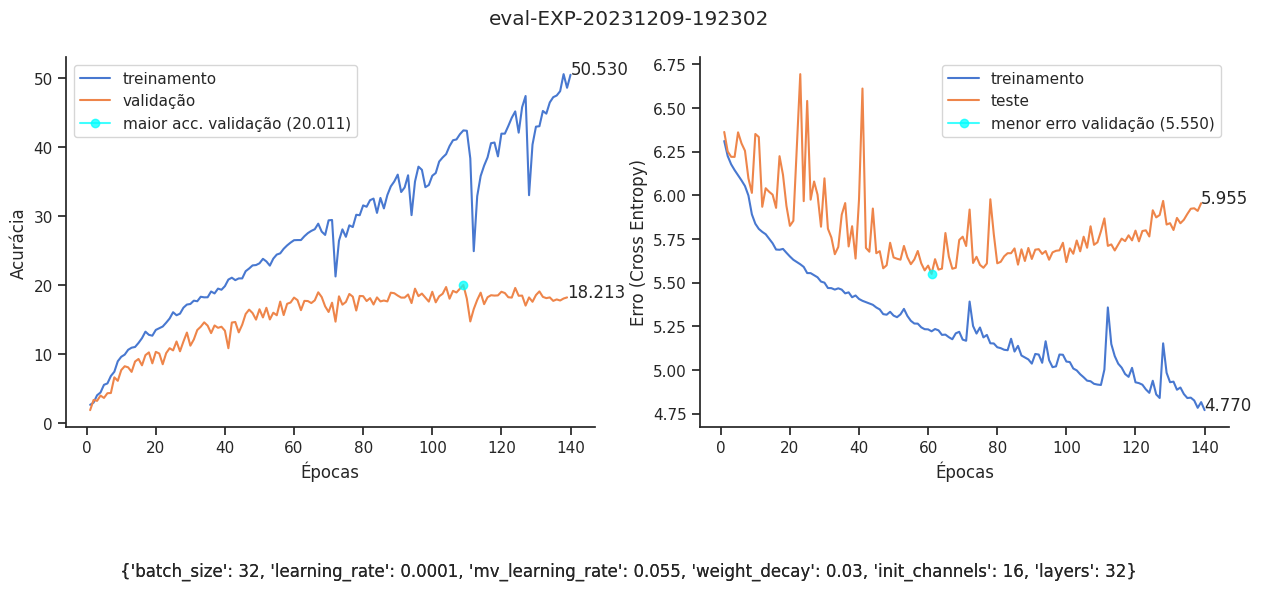

<Figure size 1500x480 with 0 Axes>

<Figure size 1500x480 with 0 Axes>

<Figure size 1500x480 with 0 Axes>

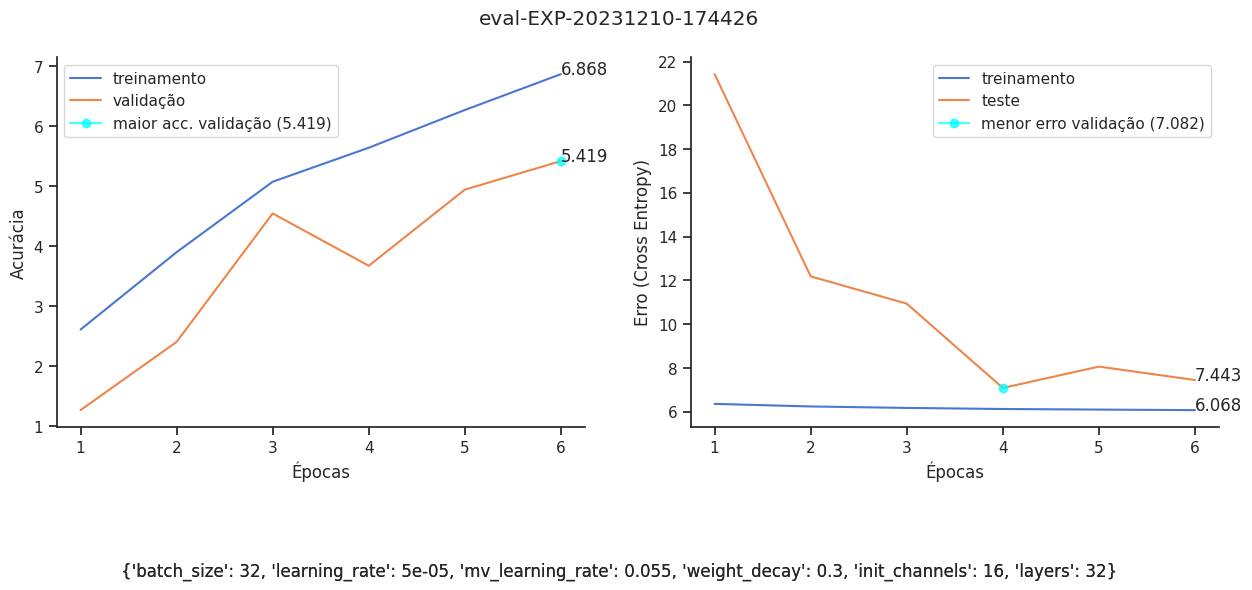

In [9]:
input_folder = "/home/tusco/videodct/PC-DARTS/saved_models/ucf101"
tags_acc = ["train_acc", "valid_acc"]
y_labels_acc = ["treinamento", "validação"]
acc_labels_text = ["Épocas", "Acurácia"]
tags_loss = ["train_loss", "valid_loss"]
y_labels_loss = ["treinamento", "teste"]
loss_labels_text = ["Épocas", "Erro (Cross Entropy)"]

tags_all = [(tags_acc, y_labels_acc, acc_labels_text), (tags_loss, y_labels_loss, loss_labels_text)]

txt_files = []
for root, dirs, files in os.walk(input_folder):
    for file in files:
        if file.endswith(".txt"):
             txt_files.append((os.path.join(root, file)))

txt_files.sort()
txt_files = [i for i in txt_files if "eval" in i][-5:]

exp_keys = [
            'batch_size', 
            'learning_rate', 
            'mv_learning_rate', 
            'weight_decay',
            'init_channels',
            'layers',
            ]

for file in txt_files:
    clear_count = 0
    fig, axs = plt.subplots(1, len(tags_all), sharex=True)
    fig.set_figwidth(15)
    for idx, (tags, y_labels, labels_txt) in enumerate(tags_all):
        axs[idx].spines[['right', 'top']].set_visible(False)
        for tag, label in zip(tags, y_labels):
            values = extract_numbers(tag, file)
            exp_context = extract_namespace(file)
            exp_context = select_keys(exp_context, exp_keys)
            if len(values) == 0:
                break
            x_axis = [i+1 for i in range(len(values))]
            if len(x_axis) == 1:
                axs[idx].plot(x_axis, values, "ro", label=label)
                axs[idx].annotate(f"{values[0]:.3f}", xy=(x_axis[0], values[0]))
            else:
                axs[idx].plot(x_axis, values, label=label)
                axs[idx].annotate(f"{values[-1]:.3f}", xy=(x_axis[-1], values[-1]))
                
                if tag == 'valid_acc':
                    x_max = np.argmax(values)
                    y_max = values[x_max]
                    # axs[idx].vlines(x_max+1, ymax=y_max, ymin=0, linestyle=':', color='b')
                    axs[idx].plot(x_max+1, y_max, color=(0, 1, 1, 0.75), marker='o', label=f"maior acc. validação ({y_max:.3f})")
                    # axs[idx].annotate(f"{y_max:.3f}", (x_max+1, y_max), xytext=(x_max+1,y_max+1), color=(1, 0, 1, 1))
                elif tag == "valid_loss":
                    x_max = np.argmin(values)
                    y_max = values[x_max]
                    # axs[idx].vlines(x_max+1, ymax=y_max, ymin=0, linestyle=':', color='b')
                    axs[idx].plot(x_max+1, y_max, color=(0, 1, 1, 0.75), marker='o', label=f"menor erro validação ({y_max:.3f})")
                    # axs[idx].annotate(f"{y_max:.3f}", (x_max+1, y_max), xytext=(x_max+1,y_max+1), color=(1, 0, 1, 1))

        if len(values) > 3:       
            axs[idx].set_xlabel(labels_txt[0])
            axs[idx].set_ylabel(labels_txt[1])
            fig.suptitle(os.path.basename(os.path.dirname(file)))
            fig.text(0.50, -0.2, f"{exp_context}", wrap=True,  horizontalalignment='center')
            axs[idx].legend()
            
            pass
        else:
            axs[idx].clear()
            clear_count += 1
            pass
    if clear_count == len(tags_all):
        fig.clear(True)
    else:
        fig.show()

    
